# **INTEGRAÇÃO DA LINGUAGEM PYTHON PARA AUXILIAR NO ENSINO DA CARTOGRAFIA**

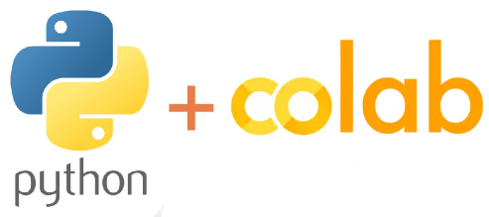

# ***Objetivo***

* Criar um material utilizando a linguagem de programação Python para auxiliar na construção do conhecimento sobre cartografia, permitindo ao aluno interagir junto com as explicações do professor/monitor


# **Instalação de bibliotecas**

*   A Biblioteca Padrão do Python é uma coleção de módulos de script acessíveis a um programa Python para simplificar o processo de programação e remover a necessidade de reescrever os comandos mais usados. Eles podem ser usados ​​chamando-os / importando-os no início de um script.




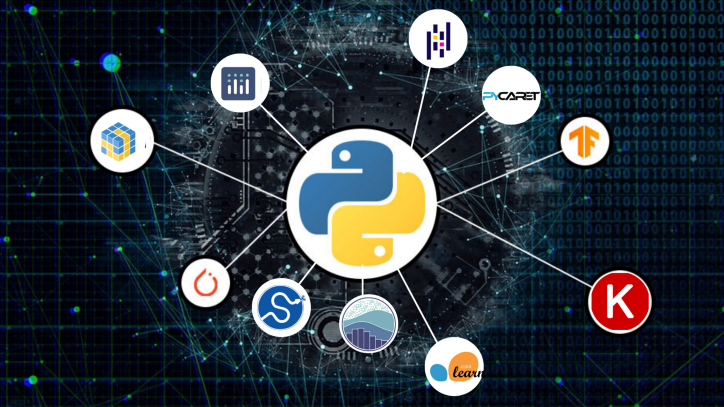

# **Link da documentação das bibliotecas utilizadas**
warnings: https://docs.python.org/3/library/warnings.html

matplotlib: https://matplotlib.org/

numpy: https://numpy.org/

cartopy: https://pypi.org/project/Cartopy/

drive: https://pypi.org/project/PyDrive/

pandas: https://pandas.pydata.org/

numpy: https://numpy.org/

Basemap: https://matplotlib.org/basemap/

geopandas: https://geopandas.org/en/stable/

folium: http://python-visualization.github.io/folium/

json: https://docs.python.org/3/library/json.html

urlopen: https://docs.python.org/3/library/urllib.request.html

plotly: https://plotly.com/python/


# **Clique no botão: ▶ para realizar a instalação da bibliotecas!**

In [ ]:
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely
!pip install https://github.com/matplotlib/basemap/archive/master.zip 
!pip install geopandas
#!pip install --upgrade shapely


# **Clique no botão: ▶ para realizar a importação das bibliotecas!**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade





# **PROJEÇÕES CARTOGRÁFICAS**




*   Normalmente, os mapas são criados por meio de transformação de dados do mundo real para uma superfície esférica ou elipsoidal (o denominado globo gerador) e então para um plano. 
*   As características deste globo gerador são que os ângulos, as distâncias ou superfícies medidas sobre este são proporcionais àquelas medidas na Terra real.

*   Existem diversos tipos de projeções, mas todas apresentam deformações.



*   Na cartografia a elipse de Tissot é um artifício matemático apresentado pelo matemático francês Nicolas Auguste Tissot no século XIX a fim de caracterizar as distorções locais devido a projeção.
*   Uma única indicatriz descreve a distorção em um único ponto. Como a distorção varia em um mapa, geralmente as indicatrizes de Tissot são colocadas em um mapa para ilustrar a mudança espacial na distorção. 

# A Elipse de Tissot ilustra as distorções lineares, angulares e de área nos mapas

1.   Um mapa distorce distâncias sempre que o quociente entre os comprimentos de uma linha infinitesimalmente curta projetada na superfície de projeção e, como é originalmente no modelo da Terra, se desvia de 1. O quociente é chamado de fator de escala . A menos que a projeção seja conforme no ponto que está sendo considerado, o fator de escala varia de acordo com a direção ao redor do ponto.

2.   Um mapa distorce os ângulos sempre que os ângulos medidos no modelo da Terra não são conservados na projeção. Isso é expresso por uma elipse de distorção que não é um círculo.

3.   Um mapa distorce áreas onde quer que as áreas medidas no modelo da Terra não sejam conservadas na projeção. Isso é expresso por elipses de distorção cujas áreas variam no mapa.

Em mapas conformes, onde cada ponto preserva ângulos projetados do modelo geométrico, as indicatrizes de Tissot são todas círculos de tamanho variando conforme a localização, possivelmente também com orientação variável. Em projeções de área igual , onde as proporções de área entre os objetos são conservadas, todas as indicatrizes de Tissot têm a mesma área, embora suas formas e orientações variem com a localização. Em projeções arbitrárias, a área e a forma variam no mapa.




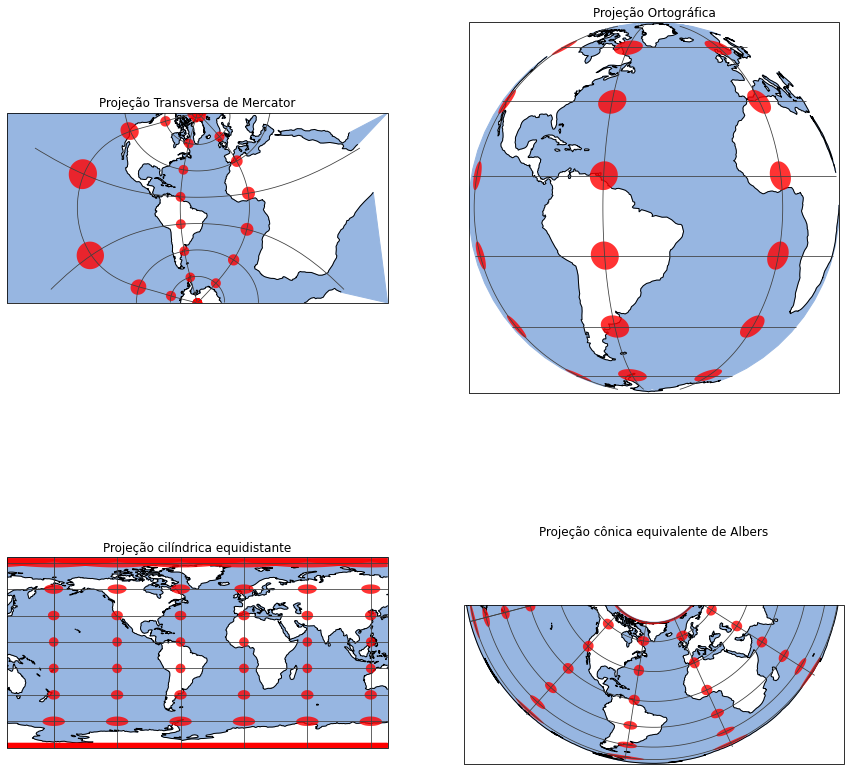

In [ ]:
#@title Interaja com as Elipse de Tissot em diferentes projeções cartográficas { run: "auto", form-width: "50%", display-mode: "both" }
Latitude = -44 #@param {type:"slider", min:-90, max:90, step:1}
Longitude = 0 #@param {type:"slider", min:-180, max:180, step:1}
#@markdown Projeção conforme: A Projeção de Mercator, corresponde a uma projeção cilíndrica, cujos paralelos (linhas retas horizontais) e meridianos (linhas retas verticais) cruzam-se em ângulos retos. Nessa projeção, a superfície sofre deformação no sentido leste-oeste e os polos apresentam-se em exagero. Há preservação dos ângulos e deformação das áreas. Esta projeção é largamente utilizada para mapas topográficos de escala 1:25.000 a 1:250.000, e é a base para o sistema de coordenadas UTM.
#@markdown 
#@markdown Projeção afilática: A projeção Ortográfica, desenvolvida por volta do Século 2 A.C., é uma projeção azimutal perspectiva que não é conforme nem equivalente ou de igual área. Esta projeção é usada nos casos polar, equatorial e oblíquo e resulta em vistas de um hemisfério completo. O espaçamento entre os paralelos decresce com o afastamento da origem e aumenta as distorções.
#@markdown 
#@markdown Projeção equidistante: Na projeção cilíndrica equidistante os meridianos são linhas retas verticais de espaçamento constante, e círculos de latitude para linhas retas horizontais de espaçamento constante. A projeção não tem área igual nem é conforme, ela preserva as distâncias.
#@markdown 
#@markdown Projeção equivalente: A projeção cônica equivalente de Albers é apropriadas para a representação do mundo todo, e são melhores para regiões com extensão maior na direção Oeste-Leste. É uma projeções equivalente, portanto mantêm a área constante em toda a sua superfície.

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import OCEAN
import warnings

warnings.filterwarnings('ignore')

# Select the map projection
projections = [ ccrs.TransverseMercator(Latitude,Longitude), ccrs.Orthographic(Latitude,Longitude), ccrs.PlateCarree(Latitude), ccrs.AlbersEqualArea(Latitude,Longitude),]
titles = ['Projeção Transversa de Mercator', 
          'Projeção Ortográfica',
          'Projeção cilíndrica equidistante', 
          'Projeção cônica equivalente de Albers']

fig, axes = plt.subplots(2, 2, subplot_kw={'projection': projections[0]}, figsize=(15,15))

#ny_lon, ny_lat = -75, 43

for ax, proj, title in zip(axes.ravel(), projections, titles):
    ax.projection = proj # Here we change projection for each subplot.
    ax.set_title(title) # Add title for each subplot.
    ax.set_global() # Set global extention
    ax.coastlines() # Add coastlines
    ax.add_feature(OCEAN) # Add oceans
    ax.tissot(facecolor='r', alpha=.8, lats=np.arange(-90,90, 25)) # Add tissot indicatrisses
    #ax.plot(ny_lon, ny_lat, 'ko', transform=ccrs.Geodetic()) # Plot the point for the NY city
    #ax.text(ny_lon + 4, ny_lat + 4, 'New York', transform=ccrs.Geodetic()) # Label New York
    ax.gridlines(color='.25', ylocs=np.arange(-90,90, 25)) # Ad gridlines
plt.show()

# ✅ **Responda** ❓
# Qual é a projeção indicada para representar o território do Brasil?

 
>>> Sua resposta está CORRETA! <<<
 
 A projeção cônica equivalente de Albers é a projeção adotada oficialmente pelo IBGE
 


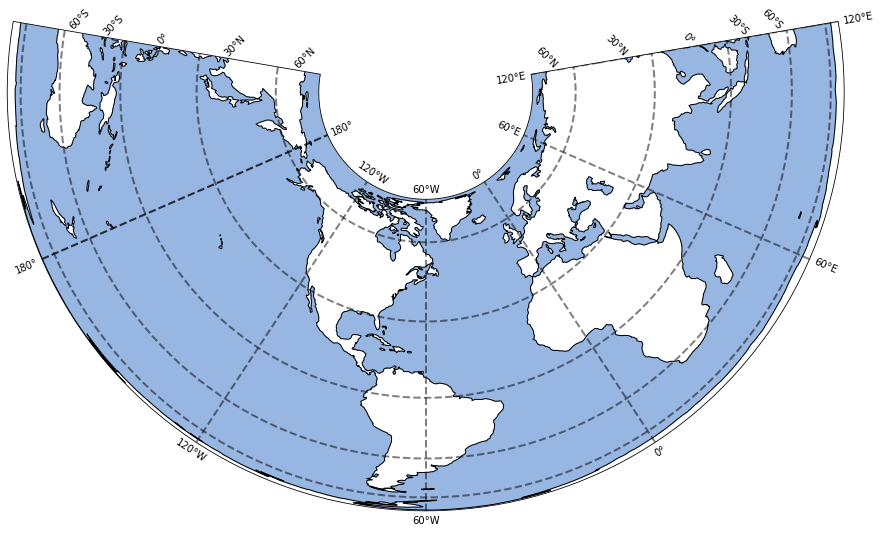

In [ ]:
#@title Selecione a resposta correta! { run: "auto", vertical-output: true, form-width: "100%" }
from termcolor import colored

Projecao = "Albers" #@param ["Projecao Ortografica", "Mercator", "Albers", "Projecao cilindrica equidistante"]



# Select the map projection



if Projecao == 'Albers':
    plt.figure(figsize=(15, 15))
    ax = plt.axes(projection=cartopy.crs.AlbersEqualArea(-60))
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(OCEAN) # Add oceans
    ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', 
    draw_labels=True, alpha=0.5, linestyle='--')
    print (" ")
    print (colored(">>> Sua resposta está CORRETA! <<<", 'blue', attrs=['bold']))
    print (" ")
    print (colored(" A projeção cônica equivalente de Albers é a projeção adotada oficialmente pelo IBGE", 'blue', attrs=['bold']))
    print (" ")
    plt.show()


elif  Projecao == 'Mercator':
      plt.figure(figsize=(15, 15))
      ax = plt.axes(projection=cartopy.crs.Mercator(-60))
      ax.add_feature(cartopy.feature.COASTLINE)
      ax.add_feature(OCEAN) # Add oceans
      ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', 
      draw_labels=True, alpha=0.5, linestyle='--')
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")
      print (colored("A projeção de Mercator é conforme o que preserva as direções e facilita a navegação.", 'red', attrs=['bold']))
      print (" ")
      plt.show()

#, Latitude)
elif  Projecao == 'Projecao Ortografica':
      plt.figure(figsize=(15, 15))
      ax = plt.axes(projection=cartopy.crs.Orthographic(0,90))
      ax.add_feature(cartopy.feature.COASTLINE)
      ax.add_feature(OCEAN) # Add oceans
      ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', 
      draw_labels=True, alpha=0.5, linestyle='--')
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")
      print (colored("A projeção Ortográfica normalmente utilizada para representar áreas menores, como regiões polares.", 'red', attrs=['bold']))
      print (" ")
      plt.show()



elif  Projecao == 'Projecao cilindrica equidistante':
      plt.figure(figsize=(15, 15))
      ax = plt.axes(projection=cartopy.crs.PlateCarree(-60))
      ax.add_feature(cartopy.feature.COASTLINE)
      ax.add_feature(OCEAN) # Add oceans
      ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='black', 
      draw_labels=True, alpha=0.5, linestyle='--')
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")
      print (colored("A Projeção cilíndrica equidistante normalmente utilizada para representar mapas temáticos.", 'red', attrs=['bold']))
      print (" ")
      plt.show()




# **MAPAS TEMÁTICOS**


Um mapa temático é um tipo de mapa que retrata o padrão geográfico de um determinado conteúdo (tema) em uma área geográfica. Isso geralmente envolve o uso de símbolos de mapa para visualizar propriedades selecionadas de características geográficas que não são naturalmente visíveis, como temperatura, idioma ou população.


Vários tipos de mapas temáticos foram inventados, a partir dos séculos XVIII e XIX, à medida que grandes quantidades de dados estatísticos começaram a ser coletados e publicados, por meio da realização de censos.



# ***Mapa coroplético***




*   As variáveis visuais mais utilizadas em mapas coropléticos são os valores de cor, variando sua intensidade conforme a sequência de valores apresentados nas classes estabelecidas.
*   Representa a proporcionalidade da variável estatística em causa, como por exemplo a densidade populacional ou o rendimento per capita.
*   Os símbolos criados a partir desta primitiva coincidem com as regiões onde foram coletados os dados.
*   A simbologia deste mapa passa ao leitor a impressão de que há uniformidade do dado dentro de cada uma das regiões e que as quebras ocorrem sempre nos limites das áreas.

*   Normalmente é utilizado uma mistura de uma cor para outra, uma progressão de tom único, transparente para opaco, claro para escuro ou todo um espectro de cores.
*   Uma desvantagem do uso da cor é que você não pode ler com precisão ou comparar os valores do mapa. 










# ⏬  **Produção de soja no Brasil entre o periodo de 1940 até 2017**  ⏬

In [ ]:
# Preparando o ambiente no Google Drive:

#importando a biblioteca
from google.colab import drive

# Isso irá pedir sua autorização
drive.mount('/content/drive')

# Agora, seu Drive estará disponível em: /content/drive/My Drive

Mounted at /content/drive


In [3]:
import plotly as plt
import plotly.express as px
import plotly
import json
from urllib.request import urlopen
import pandas as pd
 

#Importando os dados geográficos 
with urlopen('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson') as response:
    Brazil = json.load(response) # Javascrip object notation 
#Brazil
#Brazil =json.load('/content/drive/My Drive/Colab Notebooks/Trabalho_Final/brazil-states.geojson') 
 

 # definindo a informação do gráfico
state_id_map = {}
for feature in Brazil ['features']:
 feature['id'] = feature['properties']['name']
 state_id_map[feature['properties']['sigla']] = feature['id']


# chamando o banco de dados
df = pd.ExcelFile('/content/drive/My Drive/Colab Notebooks/Trabalho_Final/soja sidra.xlsx') 
df_us=pd.read_excel(df,'Planilha2')
df_us.head()


fig = px.choropleth_mapbox(
  df_us, # banco de dados da soja
  locations = 'Estado', # definindo os limites no mapa
  geojson = Brazil, # definindo as delimitações geográficas
  color_continuous_scale="Reds",
  color = 'Produção', # definindo a cor através da base de dados
  hover_name = 'Estado', # pontos que você quer mostrar na caixinha de informação
  hover_data =['Produção','Longitude','Latitude'],
  title = 'Produtivida da soja (Toneladas)', #Titulo do mapa
  mapbox_style = 'carto-positron', #Definindo novo estilo de mapa
  center={'lat':-14, 'lon': -55},#Definindo os limites geográficos que você quer mostrar
  zoom = 2, # zoom do mapa
  opacity = 0.5, #opacidade da cor do mapa
  animation_frame ='ano') #criando o aplicativo de animação

fig.show()


# ***Mapas de Símbolos Proporcionais***



*   É um método recomendado para representação quantitativa de fenômenos localizados.
*   Ideal para valores absolutos.
*   O símbolo é posicionado no local de ocorrência do evento e a sua área fica sendo proporcional à intensidade desse evento. 
*   As variáveis geralemente são os tamanhos dos símbolos e a variação de cor
*   Utiliza-se como solução centralizar as figuras geográficas no centro de
gravidade da área considerada.





# ⏬  **População x Rendimento mensal domiciliar por estados brasileiros**  ⏬

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

cities = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Trabalho_Final/data.csv')

# Extraia os dados de dinteresse
lat = cities['lat'].values
lon = cities['long'].values
population = (cities['Pop'].values)
area = (cities['rendimento_mensal_domiciliar'].values)



# 1. Desenhe o fundo do mapa
fig = plt.figure(figsize=(15, 15))
m = Basemap(projection='lcc', resolution='h', lat_0=-11.5, lon_0=-52, width=5.5E6, height=5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')


# 2. População dos estados refletindo cores
# Tamanho dos circulos em função do rendimento mensal domiciliar
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.9)

# 3. criar barra de cores e legenda referente a população

plt.colorbar(label=r'$({\rm população})$')
plt.clim(3, 7)

# legenda dos circulos em função do rendimento mensal domiciliar

for a in [800, 1100, 1300]:
    plt.scatter([], [], c='red', alpha=0.4, s=a,
                label=str(a) + ' reais')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=2.8, loc='lower left', title="Rendimento mensal por domicílio");

# ***Mapa de calor: superfície contínua***

* Mapas de calor com superfície contínua representa o fenômeno a partir do uso de valores não discretizados.
* Em geral utilizam mais de um matiz de cor.
* Dados discretos podem ter apenas valores específicos.

# ⏬  **Alvarás de Curitiba**  ⏬

In [ ]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import geopandas
import geopandas as gpd

a = '/content/drive/My Drive/Colab Notebooks/Trabalho_Final/Alvaras-Base_de_Dados.geojson'
df = gpd.read_file(a)

locations = []

m = folium.Map (location = [-25.5,-49.3],
               tiles = 'OpenStreetMap',
               zoom_start =  12
               )





bairros = '/content/drive/My Drive/Colab Notebooks/Trabalho_Final/bairros.geojson'

style = {'fillColor': '#c8c8c8', 'color': '#000000', 'fillOpacity': 0.2, 'weight': 0.4}



folium.GeoJson(
   bairros,
   name='bairros',
   tooltip=folium.GeoJsonTooltip(fields=['NOME', 'FONTE']), 
   style_function=lambda x: style
).add_to(m)



for idx, row in df.iterrows():
    locations.append([row['geometry'].y, row['geometry'].x])

HeatMap(locations,name = 'Mapa de Calor').add_to(m)

folium.LayerControl().add_to(m)




m


# ✅ **Responda** ❓
# Na cartografia temática, a cor é uma variável visual importante, perceptível e intensamente seletiva. Na aplicação das cores?

1. o verde, o magenta e o azul são consideradas cores “frias”.  

2. o vermelho, o azul e o amarelo são consideradas cores “quentes”.

3. o vermelho, o amarelo e o laranja são consideradas cores “quentes”.

4. o verde, o azul e o vermelho são consideradas cores
“frias”. 

In [ ]:
#@title Selecione a resposta correta! { run: "auto", vertical-output: true, form-width: "100%" }
from termcolor import colored

Respostas = "3" #@param ["1", "2", "3", "4"]


if Respostas == '3':
    print (" ")
    print (colored(">>> Sua resposta está CORRETA! <<<", 'blue', attrs=['bold']))
    print (" ")

elif  Respostas == '1':
      
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")
 
elif  Respostas == '2':
      
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")

elif  Respostas == '4':
      
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")


 
>>> Sua resposta está CORRETA! <<<
 


# **GENERALIZAÇÃO CARTOGRÁFICA**

* A generalização cartográfica consiste de um conjunto de operações responsáveis pelo restabelecimento das condições de comunicação que os dados cartográficos perderam pelo fato de haver redução de escala (KEATES, 1989).

* A generalização cartográfica deve ser realizada como forma de preservar a comunicação cartográfica
*  As transformações espaciais são realizadas por operadores que tratam os dados geométricos, e produzem alterações nos dados digitais do ponto de vista geográfico e/ou topológico; e em seus atributos, pela manipulação das características secundárias dos elementos. 

# **Operadores de transformação espacial**

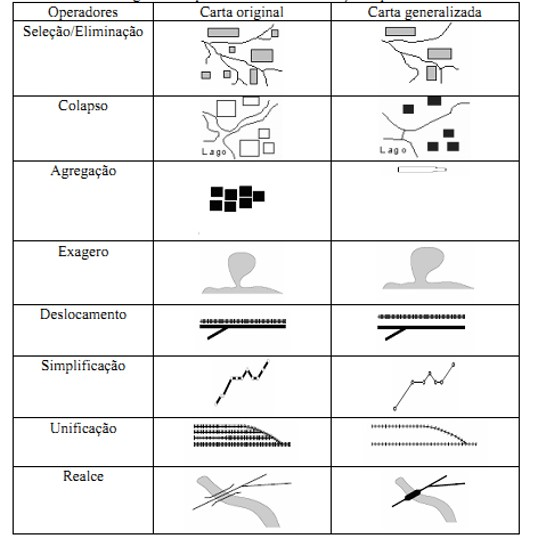

In [ ]:

from mpl_toolkits.basemap import Basemap

fig, ax = plt.subplots(1, 2, figsize=(16, 12))

for i, res in enumerate(['f', 'l']):
    m = Basemap(projection='gnom', lat_0=-2, lon_0=-50, 
                width=1E6, height=1E6, resolution=res, ax=ax[i])
    m.fillcontinents(color="#CCC6C3", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("'Mapa: {0}'".format(res));

# ✅ **Responda** ❓
# Com base nos operadores de transformação espacial, qual tipo de generalização ocorreu no mapa l em relação ao mapa f?

In [ ]:
#@title Selecione a resposta correta! { run: "auto", vertical-output: true, form-width: "100%" }
from termcolor import colored

Operadores = "Colapso" #@param ["Simplificacao", "Colapso", "Agregacao", "Exagero", "Deslocamento", "Simplificacao/Selecao / Eliminacao", "Unificacao", "Realce", "Selecao / Eliminacao"]


if Operadores == 'Simplificacao/Selecao / Eliminacao':
    print (" ")
    print (colored(">>> Sua resposta está CORRETA! <<<", 'blue', attrs=['bold']))
    print (" ")

elif  Operadores == 'Simplificacao':
      
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")

elif  Operadores == 'Selecao / Eliminacao':
      
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")
      
elif  Operadores == 'Colapso':
      
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")


elif  Operadores == 'Agregacao':
      
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")     

elif  Operadores == 'Exagero':
      
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")

elif  Operadores == 'Deslocamento':
      
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")

elif  Operadores == 'Unificacao':
      
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")

elif  Operadores == 'Realce':
      
      print (" ")
      print (colored(">>> Sua resposta está INCORRETA! <<<", 'red', attrs=['bold']))
      print (" ")

